# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
#时间序列（times series）可以是固定频率的，如每15秒，每5分钟出现一次，也可以
#不是固定频率的
#时间序列数据的意义取决于具体的应用场景，主要有以下几种：
#1.时间戳(timestamp),特定时刻
#2.固定时期(period)，如2007年1月或2010年全年
#3.时间间隔(interval),由起始和结束时间戳表示，period可以看作interval的特例
#4.实验或过程时间，每个时间点都是相对于特定起始时间的一个度量，例如，从放入烤箱时起，每秒钟饼干的直径
#在处理实验型时间序列，其索引可能是一个整数或浮点数（表示从实验开始算起已经过去的时间）
#pandas也支持timedeltas，它可以有效替代经过的时间
#pandas内置的时间序列处理工具可以轻松地切片、切块、聚合、对定期/不定期的时间序列进行重采样

## 11.1 Date and Time Data Types and Tools

In [3]:
#python标准库datetime包含日期(date),时间(time),日历(calendar)模块
#datetime库主要用到datetime,time,calendar,timedelta,tzinfo(处理时区)

In [4]:
from datetime import datetime
#datetime.datetime是用的最多的数据类型

In [5]:
now = datetime.now()

In [6]:
now
#170810是微秒，1秒=百万微秒
#所以最后最后一个数从0——1000000

datetime.datetime(2019, 8, 4, 14, 48, 49, 707488)

In [7]:
now.year

2019

In [8]:
now.month

8

In [9]:
now.day

4

In [10]:
now.year,now.month,now.day   #以元组的形式输出

(2019, 8, 4)

In [11]:
now.hour,now.minute,now.second

(14, 48, 49)

In [12]:
now.microsecond

707488

In [13]:
#datetime以毫秒形式存储日期和时间，timedelta表示两个datetime对象之间的时间差
delta = datetime(2011,1,7) - datetime(2008, 6, 24, 8, 15)

In [14]:
delta
#时间相差926天和56700秒

datetime.timedelta(days=926, seconds=56700)

In [15]:
24*60*60-8*60*60-15*60

56700

In [16]:
delta.days

926

In [17]:
delta.seconds

56700

In [18]:
#可以给一个datetime对象加上或减去一个或多个timedelta
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)  #加上12天

datetime.datetime(2011, 1, 19, 0, 0)

In [19]:
start - 2 * timedelta(12)  #减去24天

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [20]:
#利用str或datetime对象的strftime方法(传入一个格式化的字符串)，将
#datetime对象或pandas的timestamp对象可以被转换为字符串
stamp = datetime(2011,1,3)

In [21]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
str(stamp)

'2011-01-03 00:00:00'

In [23]:
stamp.strftime('%y-%m-%d')

'11-01-03'

![datetime](jietu/datetime.png)

In [24]:
#datetime.strptime可以用格式化的编码将字符串转换为datetime对象
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [25]:
datestrs = ['7/6/2011','8/6/2011']

In [26]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]
#注意%m表示两位数的月，但7/6/2011中7只有1位数，写成07/6/2011也可以

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [27]:
#datetime对象和字符串对象的转换有时需要编写定义的格式比较麻烦
#可以使用第三方库dateutil中parser模块的parse方法
from dateutil.parser import parse

In [28]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [29]:
#dateutil可以解析几乎人类能够理解的所有日期表示形式
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [30]:
#日出现在月前面很普遍，传入dayfirst=True
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [31]:
#pandas通常是用于处理成组日期的，不管这些日期是dataframe的索引还是列
#pd.to_datetime方法可以解析多种不同的日期字符串
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)
#返回的是datetimeindex对象

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [32]:
#pd.to_datetime还可以处理缺失值
idx = pd.to_datetime(datestrs + [None])

In [33]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [34]:
idx[2]
#Nat(not a time)是pandas中时间戳数据的null值

NaT

In [35]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 Time Series Basics

In [36]:
#pandas最基本的时间序列类型就是以时间戳为索引的series
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6),index=dates)

In [37]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [38]:
#这些datetime对象被放到一个datetimeindex对象中
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [39]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [40]:
ts + ts[::2]   #与一般的series一样，运算会自动对齐

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [41]:
ts.index.dtype   #以纳秒形式存储时间

dtype('<M8[ns]')

In [42]:
#datetimeindex对象中的各个标量值是pandas中的timestamp对象
stamp = ts.index[0]

In [43]:
stamp

Timestamp('2011-01-02 00:00:00')

In [44]:
#timestamp对象可以随时自动转换为datetime对象

## Indexing, Selection, Subsetting

In [45]:
#时间序列的series的索引与一般的series没什么区别
stamp = ts.index[2]

In [46]:
ts[stamp]

-0.5194387150567381

In [47]:
#还有一种更方便的用法，传入一个可以被解释为日期的字符串
ts['1/10/2011']

1.9657805725027142

In [48]:
ts['2011/1/10']

1.9657805725027142

In [49]:
ts['20110110']

1.9657805725027142

In [50]:
#对于较长的时间序列，只需要传入“年”或“年月”即可获得数据切片
longer_ts = pd.Series(np.random.randn(1000),
                       index=pd.date_range('1/1/2000', periods=1000))
#从20000101日期开始，1000天

In [51]:
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
2000-01-06   -1.296221
2000-01-07    0.274992
2000-01-08    0.228913
2000-01-09    1.352917
2000-01-10    0.886429
                ...   
2002-09-17   -0.139298
2002-09-18   -1.159926
2002-09-19    0.618965
2002-09-20    1.373890
2002-09-21   -0.983505
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [52]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
2001-01-06    0.106403
2001-01-07   -1.308228
2001-01-08    2.173185
2001-01-09    0.564561
2001-01-10   -0.190481
                ...   
2001-12-22    0.000369
2001-12-23    0.900885
2001-12-24   -0.454869
2001-12-25   -0.864547
2001-12-26    1.129120
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [53]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
2001-05-06    0.569497
2001-05-07    1.489410
2001-05-08    1.264250
2001-05-09   -0.761837
2001-05-10   -0.331617
                ...   
2001-05-22    0.503699
2001-05-23   -1.387874
2001-05-24    0.204851
2001-05-25    0.603705
2001-05-26    0.545680
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [54]:
#datetime对象也可以切片
ts[datetime(2011,1,7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [55]:
#由于大部分时间序列都是按照时间先后排序的，可以用不存在于该时间序列中的时间戳对其进行切片
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [56]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [57]:
#注意时间序列的切片产生的是源时间序列的视图，修改切片会改变源数据

In [58]:
#truncate方法也可以街区两个日期时间的timeseries
#truncate 减除
ts.truncate(after='1/9/2011')   #包括1/9/2011

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [59]:
ts.truncate(before='2011-01-05',after='1/9/2011')
#after是包括的，before是不包括的

2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [60]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [61]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
2000-02-09,1.128179,1.568606,-0.342277,-0.009813
2000-02-16,0.053072,-0.041943,-1.694312,-0.362381
2000-02-23,1.127453,2.183830,-1.186623,0.334270
2000-03-01,-1.028389,-0.168496,-0.998948,-1.531151
2000-03-08,-1.079111,-1.097732,0.405148,-0.227228


In [62]:
pd.date_range?

In [63]:
#对于索引是时间序列的dateframe，所以也与一般的dateframe一样
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [64]:
#可能存在多个观测数据落在同一个时间点上的情况
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [65]:
dup_ts.index.is_unique  #属性

False

In [66]:
dup_ts['1/3/2000']

4

In [67]:
#如果对重复的时间进行索引，则产生的是切片
dup_ts['1/2/2000']  #duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [68]:
#假设你想要对非唯一时间戳的数据进行聚合，一个办法是使用groupby,并传入level=0
grouped = dup_ts.groupby(level=0)

In [69]:
for key,group in grouped:
    print(key)
    print(group)

2000-01-01 00:00:00
2000-01-01    0
dtype: int64
2000-01-02 00:00:00
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64
2000-01-03 00:00:00
2000-01-03    4
dtype: int64


In [70]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [71]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [72]:
grouped.first()

2000-01-01    0
2000-01-02    1
2000-01-03    4
dtype: int64

In [73]:
grouped.last()

2000-01-01    0
2000-01-02    3
2000-01-03    4
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [74]:
#pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [75]:
#将时间序列转换为一个具有固定频率的时间序列
resampler = ts.resample('D')   #字符串D表示每天的意思

In [76]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges

In [77]:
#pandas.date_range可以根据指定的频率生成指定长度的datetimeindex
index = pd.date_range('2012-04-01','2012-06-01')  #包含首，包含尾

In [78]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [79]:
#默认情况下，date_range会产生频率为day的时间点
#如果只传入起始日期或结束日期，那就得再传入一个表示一段时间的数字
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [80]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [81]:
#生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"(binsiness end of month)
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

![date_range_freq](jietu/date_range.png)

In [82]:
#date_range默认会保留起始和结束时间戳的时间信息
pd.date_range('2012-05-02 12:56:31', periods=5)
#生成的结果都有12:56:31

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
#产生一组被规范化(normalize)到午夜的时间戳
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)
#生成的结果中没有时间

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [84]:
#pandas中的频率是右一个基础频率(base frequency)和一个乘数组成的。
#基础频率通常是以一个字符串别名表示，比如'M'表示每月
#对于每个基础频率，都有一个被称为日期偏移量(date offset)的对象与之对应
#比如，按小时计算的频率可以用Hour类表示
from pandas.tseries.offsets import Hour,Minute

In [85]:
hour = Hour()

In [86]:
hour

<Hour>

In [87]:
#传入一个整数可以定义偏移量的倍数
four_hours = Hour(4)

In [88]:
four_hours

<4 * Hours>

In [89]:
#一般来说不需要创建一个偏移量对象，只需要使用诸如H或4H这样的字符串别名即可
#在基础频率前面放上一个整数即可创建倍数
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [90]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')
#结果与4H一样

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [91]:
#大部分偏移量对象可以通过加法进行连接
two_h_30_m = Hour(2) + Minute(30)

In [92]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq=two_h_30_m)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00',
               '2000-01-02 01:00:00', '2000-01-02 03:30:00',
               '2000-01-02 06:00:00', '2000-01-02 08:30:00',
               '2000-01-02 11:00:00', '2000-01-02 13:30:00',
               '2000-01-02 16:00:00', '2000-01-02 18:30:00',
               '2000-01-02 21:00:00', '2000-01-02 23:30:00',
               '2000-01-03 02:00:00', '2000-01-03 04:30:00',
               '2000-01-03 07:00:00', '2000-01-03 09:30:00',
               '2000-01-03 12:00:00', '2000-01-03 14:30:00',
               '2000-01-03 17:00:00', '2000-01-03 19:30:00',
               '2000-01-03 22:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [93]:
#freq参数也可以传入频率字符串‘2h30min’
pd.date_range('2000-01-01',periods=10,freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [94]:
#有些频率所描述的时间点并不是均匀分隔的，例如'M'：每月的月末；'BM'：每月最后一个工作日。
#将这写不均匀的频率称为锚点偏移量(anchored offset)

### Week of month dates

In [95]:
#WOM是一种十分常用的频率类，它可以使你获得诸如每月第三个星期五之类的日期
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

In [96]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [97]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [98]:
#移动(shifting)指的是沿着时间轴将数据前移或后移
#series和dataframe都有一个shift方法执行单纯的前移或后移，保持索引不变

In [99]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [100]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [101]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [102]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [103]:
#当shift移动时，前面或后面会产生缺失值

In [104]:
#shift通常用于计算一个时间序列或多个时间序列的百分比变化
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.066748
2000-03-31    0.838639
2000-04-30   -0.117388
Freq: M, dtype: float64

In [105]:
ts / ts.shift(1) -1

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

In [106]:
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [107]:
#shift方法可以传入freq参数(如果频率已知的话)实现对时间戳进行位移，而不是对数据进行位移
ts.shift(2,freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [108]:
#传入shift方法的freq参数未必就是ts的频率，也可以传入其他频率
ts.shift(3,freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [109]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

### Shifting dates with offsets

In [110]:
from pandas.tseries.offsets import Day,MonthEnd

In [111]:
#pandas的日期偏移量除了可以用在freq上，也可以用在datetime或timestamp对象上
now = datetime(2011,11,17)

In [112]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [113]:
#如果加的是锚点偏移量（比如MonthEnd）,第一次增量会将原日期向前滚动到符合频率的下一个日期
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [114]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [115]:
#通过锚点偏移量的rollforward和rollback方法，可以明确地将日期想前或向后滚动
offset = MonthEnd()

In [116]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [117]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [118]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [119]:
gr = ts.groupby(offset.rollforward)

In [120]:
for key,group in gr:
    print(key)
    print(group)
#注意在key中有2000-02-29，但在ts中没有这个日期

2000-01-31 00:00:00
2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
Freq: 4D, dtype: float64
2000-02-29 00:00:00
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
Freq: 4D, dtype: float64
2000-03-31 00:00:00
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64


In [121]:
gr.mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [122]:
#上面更简单的实现方法是使用resample
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [123]:
import pytz

In [124]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [125]:
#要从pytz中获取时区对象，使用pytz.timezone即可
tz = pytz.timezone('America/New_York')

In [126]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion


In [127]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [128]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [129]:
#时间序列的index的timezone属性(tz)
#pandas中时间序列是单纯的(naive)时区
print(ts.index.tz)

None


In [130]:
#可以用时区集生成日期范围
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [131]:
#从单纯到本地化的转换是通过tz_localize方法处理的
ts_utc = ts.tz_localize('UTC')

In [132]:
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [133]:
ts_utc.index.tz

<UTC>

In [134]:
#一旦时间被本地化到了某个特定时区，就可以用tz_convert将其转换到别的时区
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [135]:
ts_utc.tz_convert('Asia/Shanghai')   #UTC+8

2012-03-09 17:30:00+08:00   -0.202469
2012-03-10 17:30:00+08:00    0.050718
2012-03-11 17:30:00+08:00    0.639869
2012-03-12 17:30:00+08:00    0.597594
2012-03-13 17:30:00+08:00   -0.797246
2012-03-14 17:30:00+08:00    0.472879
Freq: D, dtype: float64

In [136]:
#将timeseries的index本地化到'Ameria/New_York'
ts_eastern = ts.tz_localize('America/New_York')

In [137]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
Freq: D, dtype: float64

In [138]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
Freq: D, dtype: float64

In [139]:
#tz_localize和tz_convert也是datetimeindex的实例方法
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [140]:
#和时间序列一样，独立的timestamp对象也能从naive本地化为时区意识型(time zone-aware)
#并从一个时区转换到另一个时区
stamp = pd.Timestamp('2011-03-12 04:00')

In [141]:
print(stamp.tz)

None


In [142]:
stamp_utc = stamp.tz_localize('UTC')

In [143]:
stamp_utc.tz

<UTC>

In [144]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [145]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [146]:
#在创建timestamp时，还可以传入一个时区信息
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [147]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [148]:
#时区意识型timestamp对象在内部保存了一个UTC时间戳值,这个值在时区转换过程中，是不会变化的
stamp_utc.value

1299902400000000000

In [149]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [150]:
#使用dateoffset对象执行时间运算时，运算会自动关注是否存在夏令时期转变期
#先看夏令时转变前的30分钟
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30',tz='US/Eastern')

In [151]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [152]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [153]:
#夏令时转变前90分钟
stamp = pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')

In [154]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [155]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [156]:
#如果两个时间序列的时区不同，在将他们合并到一起时，最终的结果会是UTC
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [157]:
ts1 = ts[:7].tz_localize('Europe/London')

In [158]:
ts1

2012-03-07 09:30:00+00:00    0.522356
2012-03-08 09:30:00+00:00   -0.546348
2012-03-09 09:30:00+00:00   -0.733537
2012-03-12 09:30:00+00:00    1.302736
2012-03-13 09:30:00+00:00    0.022199
2012-03-14 09:30:00+00:00    0.364287
2012-03-15 09:30:00+00:00   -0.922839
Freq: B, dtype: float64

In [159]:
ts1.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B')

In [160]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [161]:
ts2

2012-03-09 13:30:00+04:00   -0.733537
2012-03-12 13:30:00+04:00    1.302736
2012-03-13 13:30:00+04:00    0.022199
2012-03-14 13:30:00+04:00    0.364287
2012-03-15 13:30:00+04:00   -0.922839
Freq: B, dtype: float64

In [162]:
ts2.index

DatetimeIndex(['2012-03-09 13:30:00+04:00', '2012-03-12 13:30:00+04:00',
               '2012-03-13 13:30:00+04:00', '2012-03-14 13:30:00+04:00',
               '2012-03-15 13:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B')

In [163]:
result = ts1 + ts2

In [164]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic

In [165]:
#时期(period)表示的是时间区间，比如数日，数月，数季
#Period类所表示的就是这种数据类型，构造period类需要传入一个字符串或整数
p = pd.Period(2007,freq='A-DEC')
#这里，这个period对象表示从2007/1/1到2007/12/31之间的整段时间

In [166]:
p

Period('2007', 'A-DEC')

In [167]:
#只需要对period对象加上或减去一个整数即可达到频率进行位移的效果
p + 5

Period('2012', 'A-DEC')

In [168]:
p - 2

Period('2005', 'A-DEC')

In [169]:
#如果两个period对象拥有相同的频率，则它们之间的差就是数量单位
pd.Period('2014',freq='A-DEC') - p

<7 * YearEnds: month=12>

In [170]:
#period_range函数可以用于创建规则的时期范围
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')

In [171]:
rng
#返回结果的类型是periodindex,可以用于索引

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [172]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [173]:
#使用字符串数组，也可以创建periodindex类
values = ['2001Q3','2002Q2','2003Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')

In [174]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [175]:
#period和periodindex对象都可以通过asfreq方法被转换为别的频率
#一个年度时期，希望被转换为当年年初或年末的一个月度时期

In [176]:
p = pd.Period('2007',freq='A-DEC')  
#上面的'A-DEC'是年第12月底最后一个日历日

In [177]:
p

Period('2007', 'A-DEC')

In [178]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [179]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [180]:
p = pd.Period('2007',freq='A-JUN')   #p为从2006/07--2007/06
p

Period('2007', 'A-JUN')

In [181]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [182]:
p.asfreq('M','end')

Period('2007-06', 'M')

![period](jietu/period.png)

In [183]:
p = pd.Period('Aug-2007','M')
p

Period('2007-08', 'M')

In [184]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [185]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [186]:
ts.asfreq('M',how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [187]:
ts.asfreq('B',how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [188]:
#许多季度数据会涉及"财年末"的概念，通常是一年12个月中某月的最后一个日历日或工作日
#时期2012Q4根据财年末的不同会有不同的含义
p = pd.Period('2012Q4',freq='Q-JAN')

In [189]:
p
#在以1月结束的财年中，2012Q4是从2011-11到2012-01

Period('2012Q4', 'Q-JAN')

In [190]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [191]:
p.asfreq('D','e')  #e:end

Period('2012-01-31', 'D')

![quarter_freq](jietu/quarter_freq.png)

In [192]:
#要获得该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16*60

In [193]:
p4pm

Period('2012-01-30 16:00', 'T')

In [194]:
p.asfreq('B','e')

Period('2012-01-31', 'B')

In [195]:
p.asfreq('B','e') -1

Period('2012-01-30', 'B')

In [196]:
(p.asfreq('B','e') -1).asfreq('T','s')

Period('2012-01-30 00:00', 'T')

In [197]:
#to_timestamp()可以将period对象转换为timestamp对象
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [198]:
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
#2011Q4对应的是2010-11到2012-01
ts = pd.Series(np.arange(len(rng)),index=rng)

In [199]:
ts


2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [200]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16 * 60

In [201]:
ts.index = new_rng.to_timestamp()

In [202]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [203]:
#to_period方法可以将由时间戳索引的series和dataframe对象转换为以时期为索引
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [204]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [205]:
pts = ts.to_period()

In [206]:
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [207]:
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

In [208]:
#由于时期指的是非重叠时间区间，因此给定的频率，一个时间戳只能属于一个时期
#新的periodindex的频率默认是从时间戳推断而来，你也可以指定别的频率
#to_period结果允许重复时期

In [209]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [210]:
ts2.index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [211]:
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [212]:
pts = ts2.to_period()

In [213]:
pts   #推断频率为D

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [214]:
pts.index

PeriodIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
             '2000-02-02', '2000-02-03'],
            dtype='period[D]', freq='D')

In [215]:
pts.to_timestamp()

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [216]:
#固定频率的数据集通常会将时间信息分开存放在多个列中
data = pd.read_csv('examples/macrodata.csv')

In [217]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [218]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
        ...  
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [219]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
      ... 
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [220]:
#将year和quarter的数组和一个频率传入PeriodIndex，可以合成一个索引
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')

In [221]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [222]:
data.index = index

In [223]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
          ... 
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [224]:
#重采样(resampling)指的是将时间序列从一个频率转换到另一个频率的处理过程
#从高频率数据聚合到低频率数据称为降采样(downsampling)
#从低频率数据聚合到高频率数据称为升采样(upsampling)
#并不是所有的重采样都能划分为这两类，比如将W-WED(每周三)转换为W-FRI既不是升也不是降

In [225]:
#pandas对象的resample方法可以分组数据，然后调用一个聚合函数
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
2000-01-06   -0.024330
2000-01-07   -2.047939
2000-01-08   -0.272657
2000-01-09   -1.692615
2000-01-10    1.423830
                ...   
2000-03-31   -0.007852
2000-04-01   -1.638806
2000-04-02    1.401227
2000-04-03    1.758539
2000-04-04    0.628932
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [226]:
dtir = ts.resample('M')  #类似于groupby方法

In [227]:
# for key,group in dtir:
#     print(key)
#     print(group)

In [228]:
dtir.mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [229]:
ts.resample('M',kind='period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

In [230]:
ts.resample('M',kind='timestamp').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

![resample](jietu/resample.png)

### Downsampling

In [231]:
#downsampling是将数据集聚合到低频率的数据集，待聚合的数据不必拥有固定的频率
#自动定义聚合的面元边界，各个时间段都是半开放的，一个数据点只能属于一个时间段
rng = pd.date_range('2000-01-01', periods=12, freq='T')  #T:每分钟
ts = pd.Series(np.arange(12),index=rng)

In [232]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [233]:
#假设你想通过求和的方式将这些数据聚合到5分钟块中
tsr = ts.resample('5min',closed='right')

In [234]:
for key,group in tsr:
    print(key)
    print(group)
    print('**********')

1999-12-31 23:55:00
2000-01-01    0
Freq: T, dtype: int64
**********
2000-01-01 00:00:00
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
Freq: T, dtype: int64
**********
2000-01-01 00:05:00
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
Freq: T, dtype: int64
**********
2000-01-01 00:10:00
2000-01-01 00:11:00    11
Freq: T, dtype: int64
**********


In [235]:
tsr.sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [236]:
#传入的频率将会以5分钟的增量定义面元边界，默认情况下，面元的左边界是包含的
#因此00:00到00:05是00：01到00:05
tsr1 = ts.resample('5min',closed='left')  #让区间的左边界闭合

In [237]:
for key,group in tsr1:
    print(key)
    print(group)

2000-01-01 00:00:00
2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int64
2000-01-01 00:05:00
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
2000-01-01 00:09:00    9
Freq: T, dtype: int64
2000-01-01 00:10:00
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64


In [238]:
tsr1.sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [239]:
#closed=right 则最终的时间序列是以各面元右边界的时间戳进行标记的
#label='right'可以用面元的右边界对其进行标记
tsr2 = ts.resample('5min',closed='right',label='right')

In [240]:
for key,group in tsr2:
    print(key)
    print(group)

2000-01-01 00:00:00
2000-01-01    0
Freq: T, dtype: int64
2000-01-01 00:05:00
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
Freq: T, dtype: int64
2000-01-01 00:10:00
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
Freq: T, dtype: int64
2000-01-01 00:15:00
2000-01-01 00:11:00    11
Freq: T, dtype: int64


In [241]:
tsr2.sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

![downresample](jietu/downresample.png)

In [242]:
#希望对结果索引做一些位移，比如从右边界减去1秒以便更明白该时间戳到底表示哪个区间
tsr3 = ts.resample('5min',closed='right',label='right',loffset='-1s')

In [243]:
for key,group in tsr3:
    print(key)
    print(group)

2000-01-01 00:00:00
2000-01-01    0
Freq: T, dtype: int64
2000-01-01 00:05:00
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
Freq: T, dtype: int64
2000-01-01 00:10:00
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
Freq: T, dtype: int64
2000-01-01 00:15:00
2000-01-01 00:11:00    11
Freq: T, dtype: int64


In [244]:
tsr3.sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Open-High-Low-Close (OHLC) resampling

In [245]:
tsr4 = ts.resample('5min',closed='left')

In [246]:
for key,group in tsr4:
    print(key)
    print(group)

2000-01-01 00:00:00
2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int64
2000-01-01 00:05:00
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
2000-01-01 00:09:00    9
Freq: T, dtype: int64
2000-01-01 00:10:00
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64


In [247]:
tsr4.ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Upsampling and Interpolation

In [248]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [249]:
#当数据从低频转换为高频时，就不需要聚合了
#当对这个数据进行聚合时，每组只有一个值，这样会引入缺失值
#我们使用asfreq方法转换成高频，不经过聚合
df_daily = frame.resample('D').asfreq()

In [250]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [251]:
#假设你想要用前面的周型值填充“非星期三”
frame.resample('D').ffill()   #按列填充

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [252]:
#只填充指定的时期数
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [253]:
frame_r = frame.resample('W-THU')
frame_r

DatetimeIndexResampler [freq=<Week: weekday=3>, axis=0, closed=right, label=right, convention=start, base=0]

In [254]:
for key,group in frame_r:
    print(key)
    print(group)

2000-01-06 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-05 -0.896431  0.677263  0.036503  0.087102
2000-01-13 00:00:00
            Colorado     Texas  New York     Ohio
2000-01-12 -0.046662  0.927238  0.482284 -0.86713


In [255]:
frame_r.asfreq()

,Colorado,Texas,New York,Ohio
2000-01-06,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


In [256]:
frame_r.ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### Resampling with Periods

In [257]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [258]:
annual_fr = frame.resample('A-DEC')

In [259]:
for key,group in annual_fr:
    print(key)
    print(group)

2000
         Colorado     Texas  New York      Ohio
2000-01  0.493841 -0.155434  1.397286  1.507055
2000-02 -1.179442  0.443171  1.395676 -0.529658
2000-03  0.787358  0.248845  0.743239  1.267746
2000-04  1.302395 -0.272154 -0.051532 -0.467740
2000-05 -1.040816  0.426419  0.312945 -1.115689
2000-06  1.234297 -1.893094 -1.661605 -0.005477
2000-07  1.102206  1.013496  2.268799  0.146326
2000-08  0.508391 -0.196713 -3.745356 -1.520113
2000-09 -0.346839 -0.696918  1.307331 -0.683641
2000-10  1.097988 -0.376561  1.188137  1.793426
2000-11  1.297900  0.817727 -0.334296 -1.565077
2000-12  1.423152  0.840784 -1.478147  0.843503
2001
         Colorado     Texas  New York      Ohio
2001-01 -0.338646  0.898593  0.300753 -1.450944
2001-02  0.487648  0.552834  0.651965 -1.746530
2001-03  0.835997 -0.511683 -0.162183  1.164055
2001-04 -0.673125  1.459242  2.377020 -0.951008
2001-05 -0.266219 -0.609657 -0.268837  0.195592
2001-06  0.859790 -0.263206  1.141350 -0.101937
2001-07 -0.076660  0.120837  1

In [260]:
annual_frame = annual_fr.mean()

In [261]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [262]:
#升采样稍微麻烦一点
frame_qdec = annual_frame.resample('Q-DEC')

In [263]:
for key,group in frame_qdec:
    print(key)
    print(group)
    print('*******')

2000Q1
      Colorado     Texas  New York      Ohio
2000  0.556703  0.016631  0.111873 -0.027445
*******
2000Q2
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******
2000Q3
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******
2000Q4
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******
2001Q1
      Colorado     Texas  New York      Ohio
2001  0.046303  0.163344  0.251503 -0.157276
*******
2001Q2
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******
2001Q3
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******
2001Q4
Empty DataFrame
Columns: [Colorado, Texas, New York, Ohio]
Index: []
*******


In [264]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [265]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [266]:
#在降采样中，目标频率必须是源频率的子时期（subperiod）
#在升采样中，目标频率必须是源频率的超时期(superperiod)
#例如，Q-MAR定义的升采样为A-MAR,A-JUN,A-SEP,A-DEC

In [267]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## 11.7 Moving Window Functions

In [268]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [269]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [270]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [271]:
close_px_1 = close_px.resample('B')

In [272]:
# for key,group in close_px_1:
#     print(key)
#     print(group)

In [273]:
close_px = close_px.resample('B').ffill()

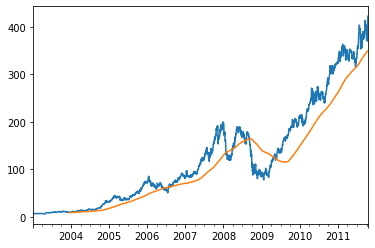

In [274]:
#引入rolling运算符,可以在timeseries或dataframe以及一个window(表示期数)上调用它
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [275]:
a = close_px.AAPL.rolling(250).mean()

In [276]:
a[240:250]

2003-12-04       NaN
2003-12-05       NaN
2003-12-08       NaN
2003-12-09       NaN
2003-12-10       NaN
2003-12-11       NaN
2003-12-12       NaN
2003-12-15       NaN
2003-12-16       NaN
2003-12-17    9.2234
Freq: B, Name: AAPL, dtype: float64

In [277]:
#rolling(250)是创建一个按照250天分组的滑动窗口对象
#得到苹果公司股价的250天的移动窗口

In [278]:
#std：标准差
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
#min_periods：每个窗口最少包含的观测值数量，小于这个值的窗口结果为NA
#min_period=10使得在0-250之间的11-250也有数值

In [279]:
appl_std250

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
                ...    
2011-10-03    25.609462
2011-10-04    25.556491
2011-10-05    25.532838
2011-10-06    25.496122
2011-10-07    25.412452
2011-10-10    25.430104
2011-10-11    25.523131
2011-10-12    25.624851
2011-10-13    25.758644
2011-10-14    25.993449
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [280]:
s = [1,2,3,5,None,10,12,14,12,30]
pd.Series(s).rolling(3,min_periods=2).mean()

0          NaN
1     1.500000
2     2.000000
3     3.333333
4     4.000000
5     7.500000
6    11.000000
7    12.000000
8    12.666667
9    18.666667
dtype: float64

In [281]:
b = pd.Series(s).rolling(3,min_periods=2)

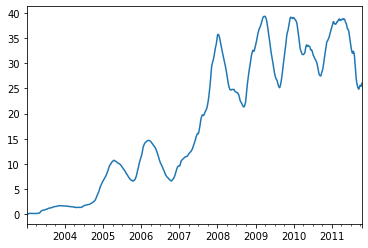

In [282]:
appl_std250.plot()

In [283]:
#扩展窗口平均(expanding window mean),扩展意味着，从时间序列的起始处开始
#窗口，增加窗口直到它超过所有的序列
expanding_mean = appl_std250.expanding().mean()

In [284]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
                ...    
2011-10-03    18.505888
2011-10-04    18.508987
2011-10-05    18.512073
2011-10-06    18.515140
2011-10-07    18.518168
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [285]:
data = { "date": pd.date_range("2018-12-04", periods=7),
        "income": [1000, 2000, np.nan, 3000, 4000, 5000, 6000]}
df = pd.DataFrame(data=data)
df

,date,income
0,2018-12-04,1000.0
1,2018-12-05,2000.0
2,2018-12-06,NaN
3,2018-12-07,3000.0
4,2018-12-08,4000.0
5,2018-12-09,5000.0
6,2018-12-10,6000.0


In [286]:
df.expanding(min_periods=1,axis=0)['income'].sum()

0     1000.0
1     3000.0
2     3000.0
3     6000.0
4    10000.0
5    15000.0
6    21000.0
Name: income, dtype: float64

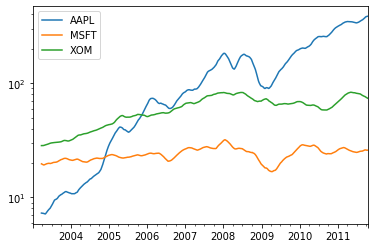

In [287]:
#对dataframe调用roling,再调用mean(),会应用到所有的列上
close_px.rolling(60).mean().plot(logy=True)  #对数Y轴

In [288]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


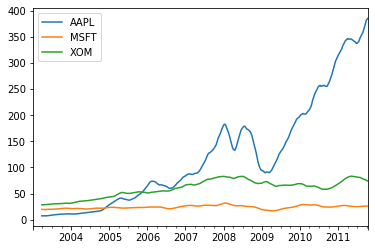

In [289]:
close_px.rolling(60).mean().plot()

In [290]:
#rolling函数也可以接受一个指定固定大小时间补偿字符串
#计算20天的滚动均值
close_px.rolling('20D').mean()   #区别rolling(20)结果不一样

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [291]:
close_px.rolling(20).mean()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN


### Exponentially Weighted Functions

[指数加权平均参考1](https://www.cnblogs.com/jiangxinyang/p/9705198.html)

[指数加权平均参考2](https://blog.csdn.net/mzpmzk/article/details/80085929)
[指数加权平均参考3](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#window-functions)

In [301]:
#pandas海域ewm运算符
#对比了苹果公司股价的30日移动平均和span=30的指数加权移动平均
#ewm:exponentially weighted moving,指数加权滑动
#ewma:指数加权滑动平均
aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
2006-01-10     80.86
2006-01-11     83.90
2006-01-12     84.29
2006-01-13     85.59
               ...  
2007-12-18    182.98
2007-12-19    183.12
2007-12-20    187.21
2007-12-21    193.91
2007-12-24    198.80
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [302]:
ma60 = aapl_px.rolling(30,min_periods=20).mean()

In [305]:
ma60[18:25]

2006-01-26          NaN
2006-01-27    78.158500
2006-01-30    78.008095
2006-01-31    77.894545
2006-02-01    77.786957
2006-02-02    77.550000
2006-02-03    77.322000
Freq: B, Name: AAPL, dtype: float64

In [306]:
ewma60 = aapl_px.ewm(span=30).mean()

In [307]:
ewma60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
2006-01-09     74.859024
2006-01-10     75.896932
2006-01-11     77.145698
2006-01-12     78.166996
2006-01-13     79.150958
                 ...    
2007-12-18    181.080178
2007-12-19    181.211779
2007-12-20    181.598761
2007-12-21    182.393035
2007-12-24    183.451549
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

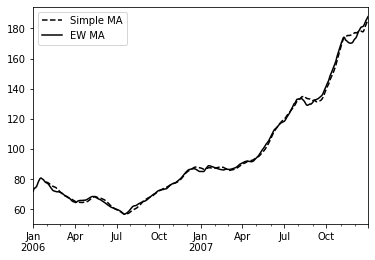

In [313]:
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [314]:
spx_px = close_px_all['SPX']

In [315]:
spx_rets = spx_px.pct_change()

In [316]:
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
2003-01-09    0.019386
2003-01-10    0.000000
2003-01-13   -0.001412
2003-01-14    0.005830
2003-01-15   -0.014426
                ...   
2011-10-03   -0.028451
2011-10-04    0.022488
2011-10-05    0.017866
2011-10-06    0.018304
2011-10-07   -0.008163
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [317]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [318]:
returns = close_px.pct_change()

In [320]:
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

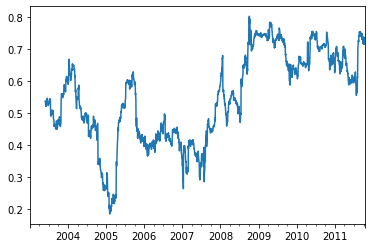

In [321]:
corr.plot()

In [322]:
#计算多个股票与标准普尔指数的相关系数
corr = returns.rolling(125,min_periods=100).corr(spx_rets)

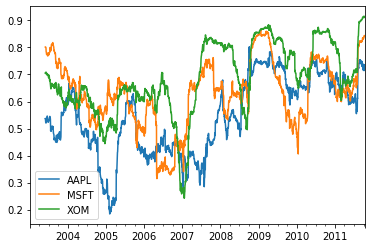

In [323]:
corr.plot()

### User-Defined Moving Window Functions

In [324]:
#可以在移动窗口上设计自己的数组函数，唯一的要求是该函数能从各个片段中产生单个值(即约简)
from scipy.stats import percentileofscore
#percentileofscore()返回样本特定值的分位数

In [325]:
score_at_2percent = lambda x: percentileofscore(x,0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


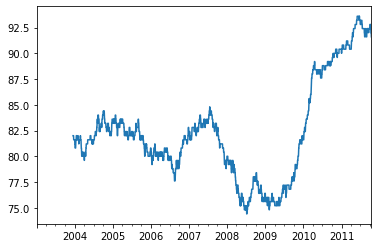

In [329]:
result.plot()